# Linear Regression Implementation

Here is the link to my source code: [Linear Regression](https://github.com/kennyerss/kennyerss.github.io/blob/main/posts/linear-reg/linear.py)

## Least-Squares Linear Regression

For this blog post, I've implemented least-squares linear regression in two ways: using the analytical method and an efficient gradient descent.

### Analytical Method

The analytical method is derived from solving the equation: $$0 = X^{T}(X \hat{w} - y)$$ 

where $X$ is our paddded feature matrix. By setting the gradient equal to $0$, we can solve for $\hat{w}$ to get an explicit solution for the optimized weight vector. Solving this equation requires $X$ to be an invertible matrix such that it has at least many rows as columns. Thus, our final solution for $\hat{w}$ is 

$$\hat{w} = (X^{T}X)^{-1} X^{T}y$$

In my `fit_analytic` method, I utilized numpy's linalg transpose and inverse methods alongside orderly matrix multiplications to calculate the optimized weight vector $\hat{w}$.

### Efficient Gradient Descent 

To implement an efficient gradient descent for least-squares linear regression, instead of computing the original gradient equation at each iteration of an epoch:

$$\nabla{L(w)} = X^{T}(Xw - y)$$

I calculated `once` $P = X^{T}X$ and $q = X^{T}y$ to reduce the time complexity of the matrix mutliplication of $X^{T}X$ being $O(np^2)$ and $X^{T}y$ being $O(np)$. Thus, reducing the gradient equation to be:

$$\nabla{L(w)} = Pw - q$$ 

reduces the time complexity of calculating the gradient to be $O(p^2)$ steps which is significantly faster! In my `fit_gradient` method, I first initialized some random weight vector of $p$ shape as my padded $X$ feature matrix. Then, I computed $P$ and $q$ which I used inside my for-loop to update my weight vector $self.w$ with the gradient. At each epoch, I calculated the `score` of the current weight vector and appended the current score to `score_history`.

# Experiments

## Demonstration

Shown below, I've generated a set of data using the `LR_data` method in my `LinearRegression` class. Then, I fit the data using both analytic and gradient descent methods and should expect a similar optimized weight vector $w$. 

In [1]:
from linear import LinearRegression 
import numpy as np 
from matplotlib import pyplot as plt

LR = LinearRegression()

def pad(X):
    return np.append(X, np.ones((X.shape[0], 1)), 1)

def LR_data(n_train = 100, n_val = 100, p_features = 1, noise = .1, w = None):
    if w is None: 
        w = np.random.rand(p_features + 1) + .2
    
    X_train = np.random.rand(n_train, p_features)
    y_train = pad(X_train)@w + noise*np.random.randn(n_train)

    X_val = np.random.rand(n_val, p_features)
    y_val = pad(X_val)@w + noise*np.random.randn(n_val)
    
    return X_train, y_train, X_val, y_val

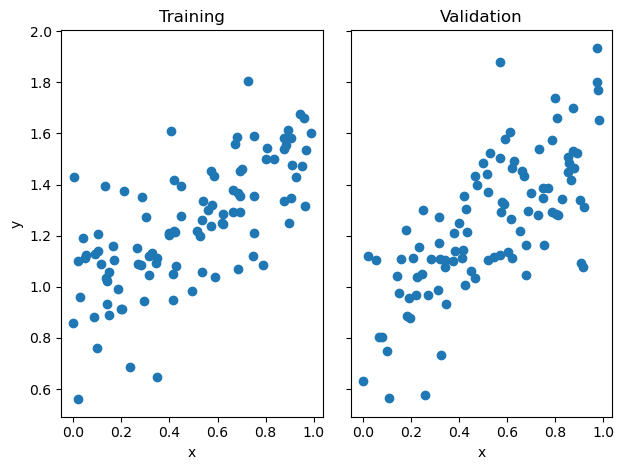

In [2]:
np.random.seed(1)

n_train = 100
n_val = 100
p_features = 1
noise = 0.2


# create some data
X_train, y_train, X_val, y_val = LR_data(n_train, n_val, p_features, noise)

# plot it
fig, axarr = plt.subplots(1, 2, sharex = True, sharey = True)
axarr[0].scatter(X_train, y_train)
axarr[1].scatter(X_val, y_val)
labs = axarr[0].set(title = "Training", xlabel = "x", ylabel = "y")
labs = axarr[1].set(title = "Validation", xlabel = "x")
plt.tight_layout()

In [3]:
LR.fit_analytic(X_train, y_train) 
w = LR.w
print(f"Training score = {LR.score(X_train, y_train, w).round(4)}")
print(f"Validation score = {LR.score(X_val, y_val, w).round(4)}")

Training score = 0.4765
Validation score = 0.4931


In [4]:
LR.w

array([0.56552291, 0.9650224 ])

In [5]:
LR2 = LinearRegression()

LR2.fit_gradient(X_train, y_train, alpha = 0.01, max_iter = int(1e2))
LR2.w

array([0.56592705, 0.9648127 ])

Then, I can plot the `score_history` of the gradient descent to see how the score evolved until the max iterations. By observation, the score evolved monotonically since we're not using stochastic gradient. 

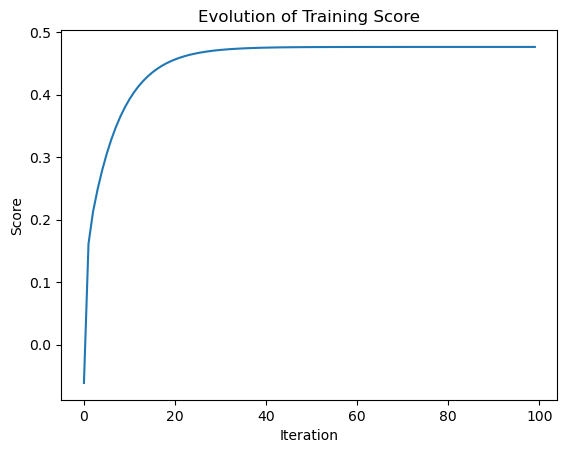

In [6]:
plt.plot(LR2.score_history)
labels = plt.gca().set(title = "Evolution of Training Score", xlabel = "Iteration", ylabel = "Score")

## Experiment 1: Increasing p_features with constant n_train

For this first experiment, I've chosen to increase the number of `p_features` to $10$, $50$, and then later choose the number of p_features to be $n-1$.

In [7]:
np.random.seed(4)

n_train = 100
n_val = 100
p_features = 10
noise = 0.2


# create some data
X_train, y_train, X_val, y_val = LR_data(n_train, n_val, p_features, noise)

In [8]:
# Use our fit_analytic method to get training and validation score
LR1 = LinearRegression()

LR1.fit_analytic(X_train, y_train) 
w = LR1.w

LR1_train_score = LR1.score(X_train, y_train, w).round(4)
LR1_validation_score = LR1.score(X_val, y_val, w).round(4)

In [9]:
np.random.seed(2)

p_features = 50
X_train, y_train, X_val, y_val = LR_data(n_train, n_val, p_features, noise)

In [10]:
# Use our fit_analytic method to get training and validation score
LR2 = LinearRegression()

LR2.fit_analytic(X_train, y_train) 
w = LR2.w

LR2_train_score = LR.score(X_train, y_train, w).round(4)
LR2_validation_score = LR.score(X_val, y_val, w).round(4)

In [11]:
np.random.seed(3)

p_features = n_train - 1 
X_train, y_train, X_val, y_val = LR_data(n_train, n_val, p_features, noise)

In [12]:
# Use our fit_analytic method to get training and validation score
LR3 = LinearRegression()

LR3.fit_analytic(X_train, y_train) 
w = LR3.w

LR3_train_score = LR3.score(X_train, y_train, w).round(4)
LR3_validation_score = LR3.score(X_val, y_val, w).round(4)

We can visualize the training and validation scores to visibly observe the differences of each experiment as we increase the number of `p_features`.

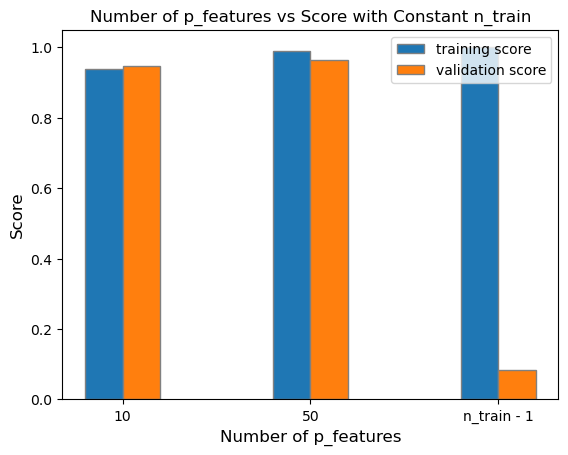

In [13]:
# Code from https://www.geeksforgeeks.org/bar-plot-in-matplotlib/
bar_width = 0.2

training_scores = [LR1_train_score, LR2_train_score, LR3_train_score]
validation_scores = [LR1_validation_score, LR2_validation_score, LR3_validation_score]

# Set position of bar on X axis
br1 = np.arange(len(training_scores))
br2 = [x + bar_width for x in br1]

# Make the plot
plt.bar(br1, training_scores, width = bar_width,
        edgecolor ='grey', label ='training score')
plt.bar(br2, validation_scores, width = bar_width,
        edgecolor ='grey', label ='validation score')

plt.title('Number of p_features vs score with constant n_train')

# Adding Xticks
plt.xlabel('Number of p_features', fontsize = 12)
plt.ylabel('Score', fontsize = 12)
plt.xticks([r + 0.1 for r in range(len(training_scores))],
        ['10', '50', 'n_train - 1'])

legend = plt.legend()
plt.show()

As shown on the graph above, we can see that as the number of `p_features` increases up to `n_train - 1`, the fitted model's `training_score` also increases. However, the model's `validation score` decreases. This conclusion is related to the model being `overfit` due to the significant difference of the training and validation score between the model with `n_train - 1` p_features. This means that we've trained the model exactly to some random training data given, however, when validated on the true labels, the calculated optimized weight vector $w$ will be highly inaccurate in comparison to the labels.  

## Experiment 2: LASSO Regularization

Using LASSO regularization, we modify the original loss function to add a `regularization term`: 

$$L(w) = ||Xw - y||^{2}_{2} + \alpha||w'||_{1}$$

This extension of the regularization term minimizes the weight vector $w$ as small as it could be and forces the weight vector's entries to be *exactly* zero.

### Varying Degrees of Alpha 

For this experiment, we can choose varying degrees of *alpha* while increasing the number of `p_features` of our data. 

In [14]:
from sklearn.linear_model import Lasso

In [15]:
# Alpha of 0.001
L1 = Lasso(alpha = 0.001)

In [16]:
p_features = 10

# Fit our model
X_train, y_train, X_val, y_val = LR_data(n_train, n_val, p_features, noise)
L1.fit(X_train, y_train)
L1_validation_1 = L1.score(X_val, y_val)

In [17]:
p_features = 50

# Fit our model
X_train, y_train, X_val, y_val = LR_data(n_train, n_val, p_features, noise)
L1.fit(X_train, y_train)
L1_validation_2 = L1.score(X_val, y_val)

In [18]:
p_features = n_train - 1 

# Fit our model
X_train, y_train, X_val, y_val = LR_data(n_train, n_val, p_features, noise)
L1.fit(X_train, y_train)
L1_validation_3 = L1.score(X_val, y_val)

After fitting the Lasso model with an alpha of $0.001$, we can plot its validation scores in contrast to the standard linear regression. 

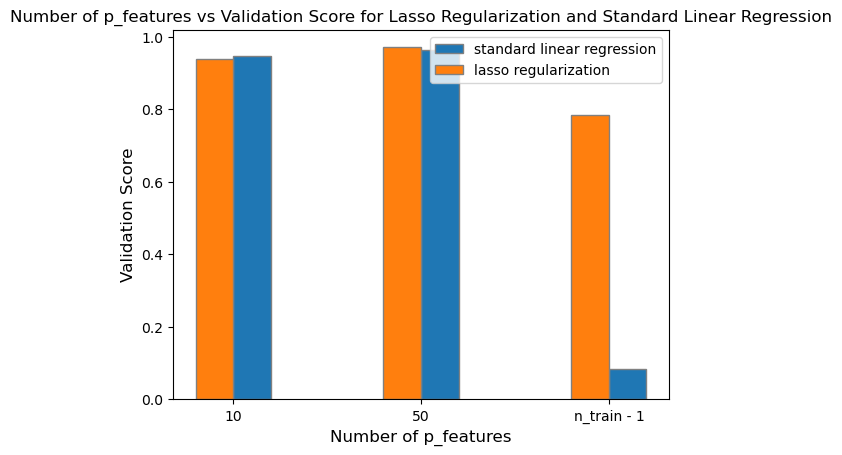

In [33]:
bar_width = 0.2

lasso_validation = [L1_validation_1, L1_validation_2, L1_validation_3]
linear_validation = [LR1_validation_score, LR2_validation_score, LR3_validation_score]

# Set position of bar on X axis
br1 = np.arange(len(lasso_validation))
br2 = [x + bar_width for x in br1]

# Make the plot
plt.bar(br2, linear_validation, width = bar_width,
        edgecolor ='grey', label ='standard linear regression')
plt.bar(br1, lasso_validation, width = bar_width,
        edgecolor ='grey', label ='lasso regularization')

plt.title('Number of p_features vs Validation Score for Lasso Regularization and Standard Linear Regression')

# Adding Xticks
plt.xlabel('Number of p_features', fontsize = 12)
plt.ylabel('Validation Score', fontsize = 12)
plt.xticks([r + 0.1 for r in range(len(lasso_validation))],
        ['10', '50', 'n_train - 1'])

legend = plt.legend()
plt.show()

In [20]:
# Alpha of 0.01
L2 = Lasso(alpha = 0.01)

In [21]:
p_features = 10

# Fit our model
X_train, y_train, X_val, y_val = LR_data(n_train, n_val, p_features, noise)
L2.fit(X_train, y_train)
L2_validation_1 = L2.score(X_val, y_val)

In [22]:
p_features = 50

# Fit our model
X_train, y_train, X_val, y_val = LR_data(n_train, n_val, p_features, noise)
L2.fit(X_train, y_train)
L2_validation_2 = L2.score(X_val, y_val)

In [23]:
p_features = n_train - 1

# Fit our model
X_train, y_train, X_val, y_val = LR_data(n_train, n_val, p_features, noise)
L2.fit(X_train, y_train)
L2_validation_3 = L2.score(X_val, y_val)

After fitting the Lasso model with an alpha of $0.01$, we can plot its validation scores in contrast to the standard linear regression. 

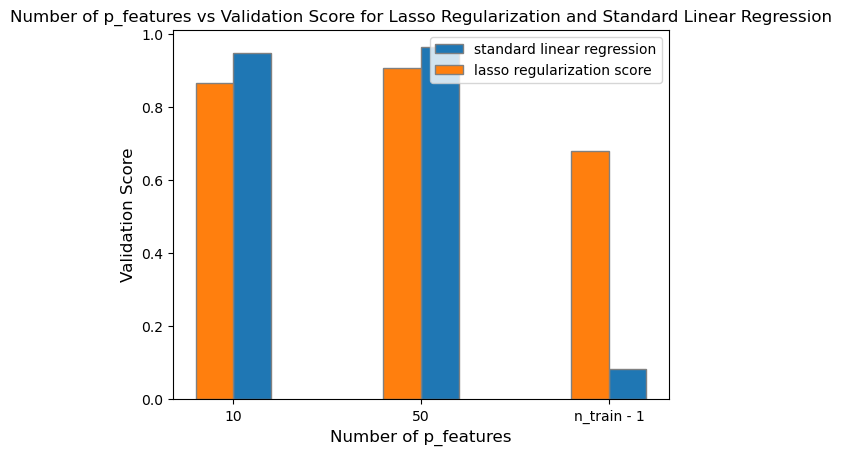

In [34]:
bar_width = 0.2

lasso_validation = [L2_validation_1, L2_validation_2, L2_validation_3]
linear_validation = [LR1_validation_score, LR2_validation_score, LR3_validation_score]

# Set position of bar on X axis
br1 = np.arange(len(lasso_validation))
br2 = [x + bar_width for x in br1]

# Make the plot
plt.bar(br2, linear_validation, width = bar_width,
        edgecolor ='grey', label ='standard linear regression')
plt.bar(br1, lasso_validation, width = bar_width,
        edgecolor ='grey', label ='lasso regularization score')

plt.title('Number of p_features vs Validation Score for Lasso Regularization and Standard Linear Regression')

# Adding Xticks
plt.xlabel('Number of p_features', fontsize = 12)
plt.ylabel('Validation Score', fontsize = 12)
plt.xticks([r + 0.1 for r in range(len(lasso_validation))],
        ['10', '50', 'n_train - 1'])

legend = plt.legend()
plt.show()

In [25]:
# Alpha of 0.1
L3 = Lasso(alpha = 0.1)

In [26]:
p_features = 10

# Fit our model
X_train, y_train, X_val, y_val = LR_data(n_train, n_val, p_features, noise)
L3.fit(X_train, y_train)
L3_validation_1 = L3.score(X_val, y_val)

In [27]:
p_features = 50

# Fit our model
X_train, y_train, X_val, y_val = LR_data(n_train, n_val, p_features, noise)
L3.fit(X_train, y_train)
L3_validation_2 = L3.score(X_val, y_val)

In [28]:
p_features = n_train - 1

# Fit our model
X_train, y_train, X_val, y_val = LR_data(n_train, n_val, p_features, noise)
L3.fit(X_train, y_train)
L3_validation_3 = L3.score(X_val, y_val)

After fitting the Lasso model with an alpha of $0.1$, we can plot its validation scores in contrast to the standard linear regression. 

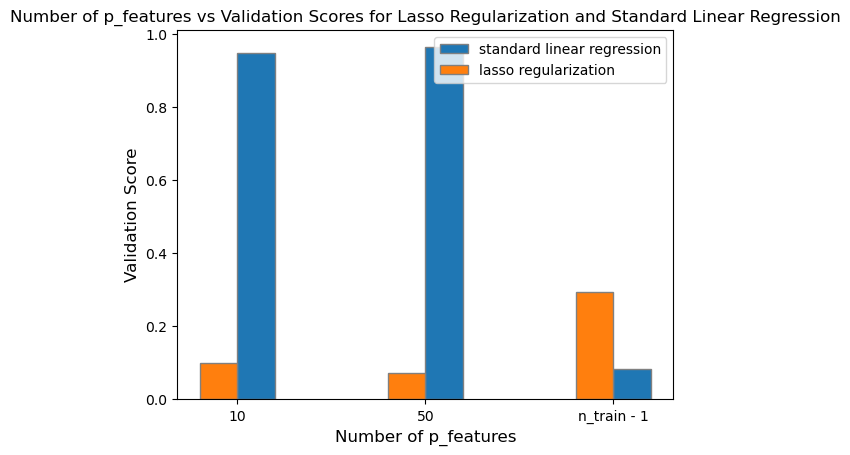

In [36]:
bar_width = 0.2

lasso_validation = [L3_validation_1, L3_validation_2, L3_validation_3]
linear_validation = [LR1_validation_score, LR2_validation_score, LR3_validation_score]

# Set position of bar on X axis
br1 = np.arange(len(lasso_validation))
br2 = [x + bar_width for x in br1]

# Make the plot
plt.bar(br2, linear_validation, width = bar_width,
        edgecolor ='grey', label ='standard linear regression')
plt.bar(br1, lasso_validation, width = bar_width,
        edgecolor ='grey', label ='lasso regularization')

plt.title('Number of p_features vs Validation Scores for Lasso Regularization and Standard Linear Regression')

# Adding Xticks
plt.xlabel('Number of p_features', fontsize = 12)
plt.ylabel('Validation Score', fontsize = 12)
plt.xticks([r + 0.1 for r in range(len(lasso_validation))],
        ['10', '50', 'n_train - 1'])

legend = plt.legend()

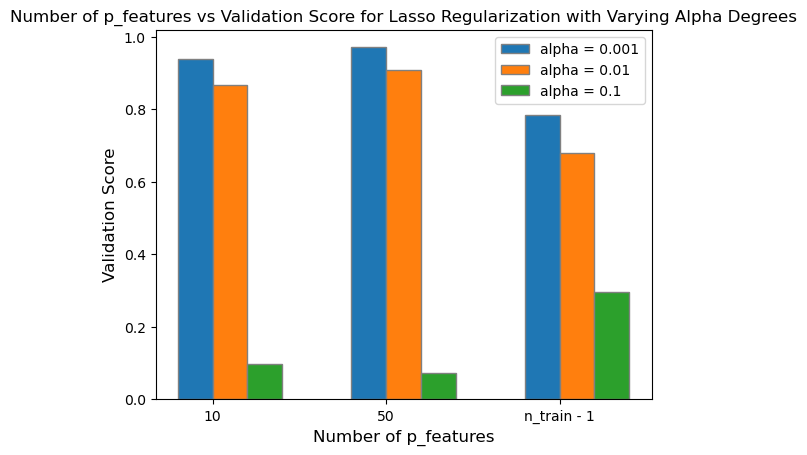

In [30]:
# Plotting all three alpha levels

bar_width = 0.2

lasso_validation_1 = [L1_validation_1, L1_validation_2, L1_validation_3]
lasso_validation_2 = [L2_validation_1, L2_validation_2, L2_validation_3]
lasso_validation_3 = [L3_validation_1, L3_validation_2, L3_validation_3]

# Set position of bar on X axis
br1 = np.arange(len(lasso_validation_1))
br2 = [x + bar_width for x in br1]
br3 = [x + bar_width for x in br2]

# Make the plot
plt.bar(br1, lasso_validation_1, width = bar_width,
        edgecolor ='grey', label ='alpha = 0.001')
plt.bar(br2, lasso_validation_2, width = bar_width,
        edgecolor ='grey', label ='alpha = 0.01')
plt.bar(br3, lasso_validation_3, width = bar_width,
        edgecolor ='grey', label ='alpha = 0.1')

plt.title('Number of p_features vs Validation Score for Lasso Regularization with Varying Alpha Degrees')

# Adding Xticks
plt.xlabel('Number of p_features', fontsize = 12)
plt.ylabel('Validation Score', fontsize = 12)
plt.xticks([r + 0.1 for r in range(len(lasso_validation))],
        ['10', '50', 'n_train - 1'])

legend = plt.legend()

After plotting all three degrees of alpha with increasing number of `p_features` up to `n_train - 1`, I found that smaller values of alpha (alpha = $0.001$) will still retain a moderately high validation score despite reaching up to n_train - 1 number of p_features. However, as I increase the degree of alpha to $0.01$ and $0.1$, the difference in validation score between LASSO regularization and standard linear regression becomes significantly different. As I increase the strength of the regularizer, the validation score for LASSO regularization approaches zero, and is no longer accuracte in predicting the true labels.

In conclusion, LASSO regularization can improve a model's validation score with smaller alpha levels in contrast to utilizing standard linear regression even with up to n_train - 1 number of p_features. However, as you increase the strength of the regularization, the validation score decreases significantly, and the model is no longer proficient in its predictions. 